# > CS23MTECH11025 : ARNAB GHOSH

# > CS23MTECH11029 : PATEL HEETKUMAR D.          


# Importing required libraries, Importing dataset and creating numpy array

In [5]:
#import python libraries to perform PCA
import scipy
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
#load .mat dataset using scipy
mat_dataset = scipy.io.loadmat('/content/train_32x32.mat')
mat_test_dataset = scipy.io.loadmat('/content/test_32x32.mat')
print("Train Dataset")
print(mat_dataset)
print("Test Dataset")
print(mat_dataset)

Train Dataset
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011', '__version__': '1.0', '__globals__': [], 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223

In [ ]:
#converting X and y of dataset into respective numpy array and select randomly 2500 tuples from each class
X = np.array(mat_dataset['X'])
Y = np.array(mat_dataset['y'])
y = Y.flatten() - 1
selected_X = []
selected_Y = []
for i in range(10):
    indices = np.where(y==i)[0]
    s_indices = np.random.choice(indices,2500,replace=False)
    selected_X.append(X[:,:,:,s_indices])
    selected_Y.append(Y[s_indices])
X = np.concatenate(selected_X,axis=3)
Y = np.concatenate(selected_Y)
print("X : ",X)
print("Y : ",Y)
test_X = np.array(mat_test_dataset['X'])
test_Y = np.array(mat_test_dataset['y'])
print("X test : ",X)
print("Y test: ",Y)

X :  [[[[115 155 155 ... 183 193 101]
   [ 75 141 162 ... 182 167  95]
   [ 73 128 176 ... 190 152  81]]

  [[115 157 140 ... 178 193 101]
   [ 75 143 151 ... 179 167  95]
   [ 75 130 173 ... 188 150  83]]

  [[115 154 116 ... 171 192 100]
   [ 74 140 130 ... 174 169  93]
   [ 79 129 159 ... 186 151  83]]

  ...

  [[184 231  80 ...  87  91 108]
   [191 235  94 ...  87  70  95]
   [197 237 131 ... 133  77  73]]

  [[190 232  79 ... 112  84 106]
   [195 236  95 ... 111  61  91]
   [201 234 130 ... 149  69  70]]

  [[193 234  84 ... 133  77 101]
   [197 239 101 ... 134  52  89]
   [206 235 132 ... 163  58  67]]]


 [[[112 164 153 ... 181 193 112]
   [ 74 150 161 ... 183 167 105]
   [ 71 137 176 ... 191 150  94]]

  [[114 162 136 ... 173 194 104]
   [ 74 150 148 ... 176 168  97]
   [ 74 136 172 ... 188 151  90]]

  [[113 159 109 ... 163 192  91]
   [ 72 147 123 ... 167 170  86]
   [ 76 134 156 ... 183 149  80]]

  ...

  [[166 233  79 ...  86 101 108]
   [172 235  92 ...  87  78  95]
   [

In [ ]:
#printing shape size type of X and Y array
print("X dtype : ",X.dtype)
print("X shape : ",X.shape)
print("X dimen : ",X.ndim)
print("Y dtype : ",Y.dtype)
print("Y shape : ",Y.shape)
print("Y dimen : ",Y.ndim)

X dtype :  uint8
X shape :  (32, 32, 3, 25000)
X dimen :  4
Y dtype :  uint8
Y shape :  (25000, 1)
Y dimen :  2


## Q1 (a) From basic without using PCA

In [ ]:
#converting the X from shape (32 * 32 * 3 * 25000) to shape (25000 * 32 * 32 * 3)
#then reshaping it to (25000 * 3072) by converting it by flattening of other dimensions
X_shape = X.shape
reshape_X = X.transpose(3,0,1,2).reshape(X_shape[3],-1)
print(reshape_X.shape)
test_X_shape = test_X.shape
reshape_test_X = test_X.transpose(3,0,1,2).reshape(test_X_shape[3],-1)

(25000, 3072)


In [ ]:
#calculating Standardize value of X using StandardScaler function which do X = (x - mean) / std
standardized_X = StandardScaler().fit_transform(reshape_X)
print(standardized_X)
print(standardized_X.shape)

[[-0.00893919 -0.75686926 -0.8636565  ...  1.62223547  1.77238228
   1.88505629]
 [ 0.76008965  0.48698339  0.18542496 ...  2.22553659  2.38471677
   2.2775559 ]
 [ 0.76008965  0.88275469  1.10098696 ... -0.94665965 -0.52387206
   0.37393281]
 ...
 [ 1.29840983  1.25967973  1.36802587 ... -0.81043036 -0.90658111
  -0.31294151]
 [ 1.49066704  0.97698595  0.64320596 ...  1.46654485  1.02609962
   0.57018261]
 [-0.27809928 -0.37994422 -0.71106284 ...  0.08479066 -0.02635028
  -0.41106641]]
(25000, 3072)


In [ ]:
#finding covariance of the standardized X array
cov_X = np.cov(standardized_X,rowvar=False)
print(cov_X)
print(cov_X.shape)

[[1.00004    0.96480257 0.88983154 ... 0.53838414 0.50688073 0.50087274]
 [0.96480257 1.00004    0.9512694  ... 0.50381297 0.51575958 0.52805627]
 [0.88983154 0.9512694  1.00004    ... 0.48990578 0.52040114 0.58320704]
 ...
 [0.53838414 0.50381297 0.48990578 ... 1.00004    0.96416334 0.88535482]
 [0.50688073 0.51575958 0.52040114 ... 0.96416334 1.00004    0.94865942]
 [0.50087274 0.52805627 0.58320704 ... 0.88535482 0.94865942 1.00004   ]]
(3072, 3072)


In [ ]:
#calculating the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_X)
print("Eigenvalues : \n",eigenvalues)
print("Eigenvalues array shape: \n",eigenvalues.shape)
print("Eigenvectors : \n",eigenvectors)
print("Eigenvectors array shape: \n",eigenvectors.shape)

Eigenvalues : 
 [1.76881630e+03 1.78974734e+02 1.60179538e+02 ... 5.56596368e-05
 5.56292832e-05 5.58304799e-05]
Eigenvalues array shape: 
 (3072,)
Eigenvectors : 
 [[ 0.01727392 -0.00544575 -0.02624164 ...  0.01403897 -0.00755242
  -0.00260903]
 [ 0.01760977 -0.00164772 -0.02485584 ... -0.0275182   0.01335972
   0.00473053]
 [ 0.01837169  0.00615957 -0.01735454 ...  0.01179675 -0.00477702
  -0.00384424]
 ...
 [ 0.01661218 -0.02782276  0.00436236 ...  0.00464294 -0.00078703
   0.00938824]
 [ 0.01695905 -0.02610478  0.00848876 ... -0.0033106   0.00999647
   0.00186507]
 [ 0.01790885 -0.01813211  0.01544238 ...  0.00065716 -0.00819097
  -0.0098397 ]]
Eigenvectors array shape: 
 (3072, 3072)


In [ ]:
#calulcating variance of each eigenvalues
sortindices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sortindices]
eigenvectors= eigenvectors[sortindices]
variance_X = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(variance_X)

[0.57576352 0.6340212  0.68616089 ... 0.99999998 0.99999999 1.        ]


In [ ]:
#top eigenvectors with variance > 0.9
top_eigenvectors_count = np.argmax(variance_X >= 0.9) + 1
print("EigenVectors count variance above 0.9 : ",top_eigenvectors_count)

EigenVectors count variance above 0.9 :  27


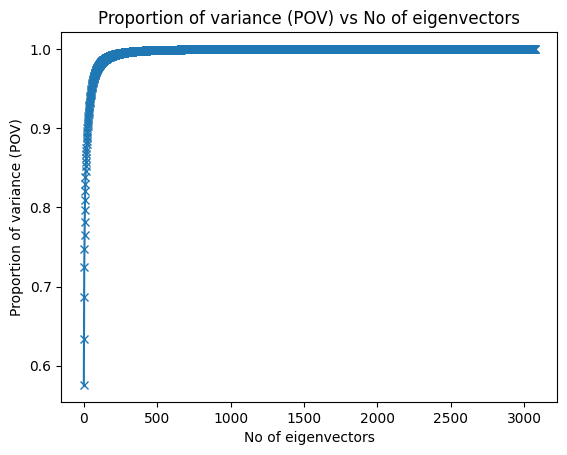

In [ ]:
#Proportion of varianve vs No of eigenvectors plot
plt.plot(range(len(variance_X)),variance_X, marker='x')
plt.title("Proportion of variance (POV) vs No of eigenvectors")
plt.xlabel("No of eigenvectors")
plt.ylabel("Proportion of variance (POV)")
plt.show()

## Q1 (a) Using PCA module from sklearn

In [ ]:
#calculating eigenvectors by fitting data on prebuild PCA function.
pca_a = PCA()
pca_a.fit(reshape_X)
cum_variance = np.cumsum(pca_a.explained_variance_ratio_)
eigenvectors_count = np.argmax(cum_variance >= 0.9) + 1
print("EigenVectors count variance above 0.9 : ",eigenvectors_count)

EigenVectors count variance above 0.9 :  26


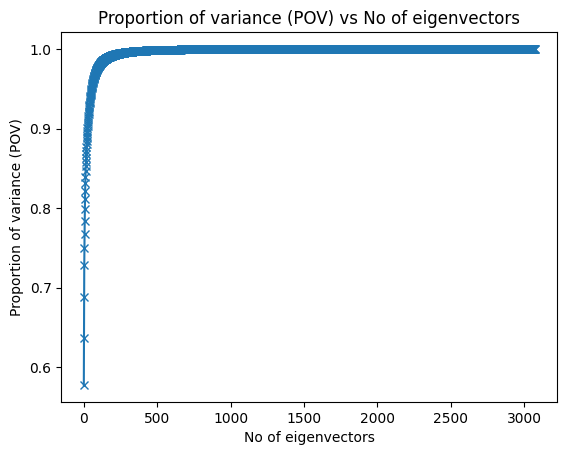

In [ ]:
#Proportion of varianve vs No of eigenvectors plot calculated using prebuild PCA function
plt.plot(range(len(cum_variance)),cum_variance, marker='x')
plt.title("Proportion of variance (POV) vs No of eigenvectors")
plt.xlabel("No of eigenvectors")
plt.ylabel("Proportion of variance (POV)")
plt.show()

## Q1 (b) Top 10 Eigenvectors visualization and Reconstruction of 10 SVHN sample one from each class using top 10 eigenvectors

In [ ]:
#fetching top ten eigenvectors from the pca model
top_ten_eigenvectors = pca_a.components_[:10, :]

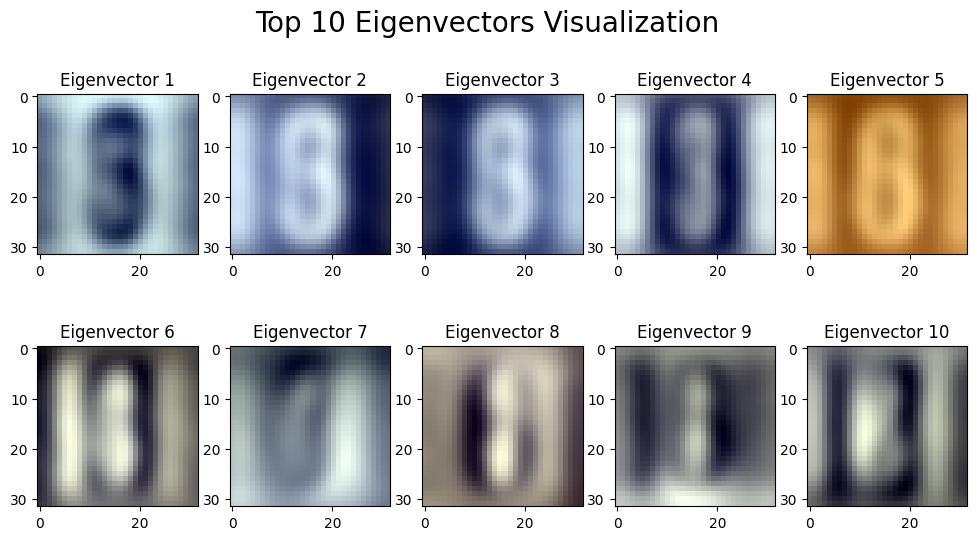

In [ ]:
#plotting the top ten eigenvectors which we got from the trained PCA model
plt.figure(figsize = (12,6))
for i in range(len(top_ten_eigenvectors)):
    top_ten_eigenvectors[i] = (top_ten_eigenvectors[i]-np.min(top_ten_eigenvectors[i])) / (np.max(top_ten_eigenvectors[i]) - np.min(top_ten_eigenvectors[i]))
    plt.subplot(2,5,i+1)
    plt.imshow(top_ten_eigenvectors[i].reshape(32,32,3))
    plt.title(f"Eigenvector {i+1}")
plt.suptitle("Top 10 Eigenvectors Visualization",fontsize=20)
plt.show()

In [ ]:
#fetching 10 SVHN sample one from each class for reconstruction and reshape it to reqiured shape.
y = Y.flatten() - 1
selected_X = []
selected_Y = []
for i in range(10):
    indices = np.where(y==i)[0]
    s_indices = np.random.choice(indices,1,replace=False)
    selected_X.append(X[:,:,:,s_indices])
    selected_Y.append(Y[s_indices])
ten_tuple_X = np.concatenate(selected_X,axis=3)
ten_tuple_Y = np.concatenate(selected_Y)
ten_tuple_X_shape = ten_tuple_X.shape
reshape_ten_tuple_X = ten_tuple_X.transpose(3,0,1,2).reshape(ten_tuple_X_shape[3],-1)

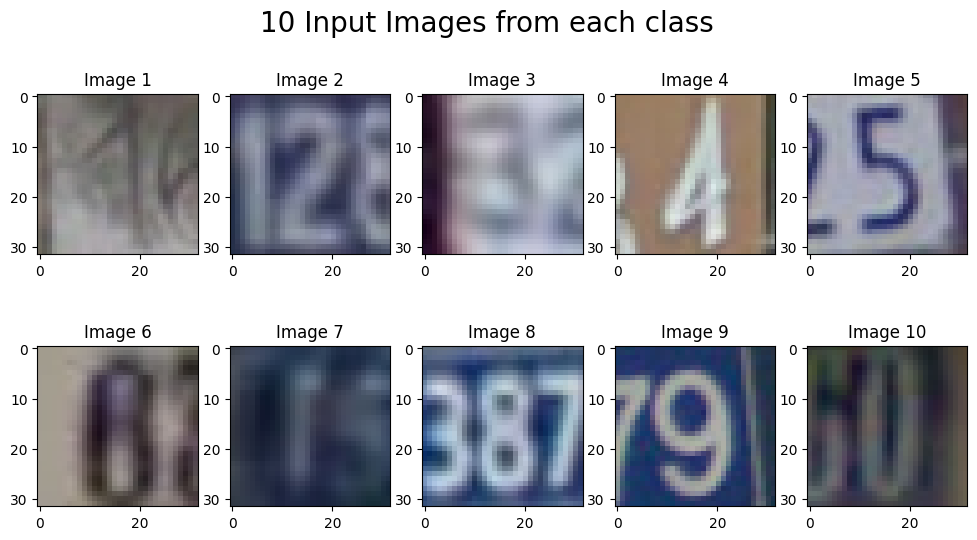

In [ ]:
#plotting 10 Input images
plt.figure(figsize = (12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(ten_tuple_X[:,:,:,i])
    plt.title(f"Image {i+1}")
plt.suptitle("10 Input Images from each class",fontsize=20)
plt.show()

In [ ]:
#building model on 10 top components(eigenvectors)
pca_b = PCA(n_components = 10)
reduced_X = pca_b.fit_transform(reshape_ten_tuple_X)
reconstructed_X = np.dot(reduced_X,pca_b.components_) + pca_b.mean_

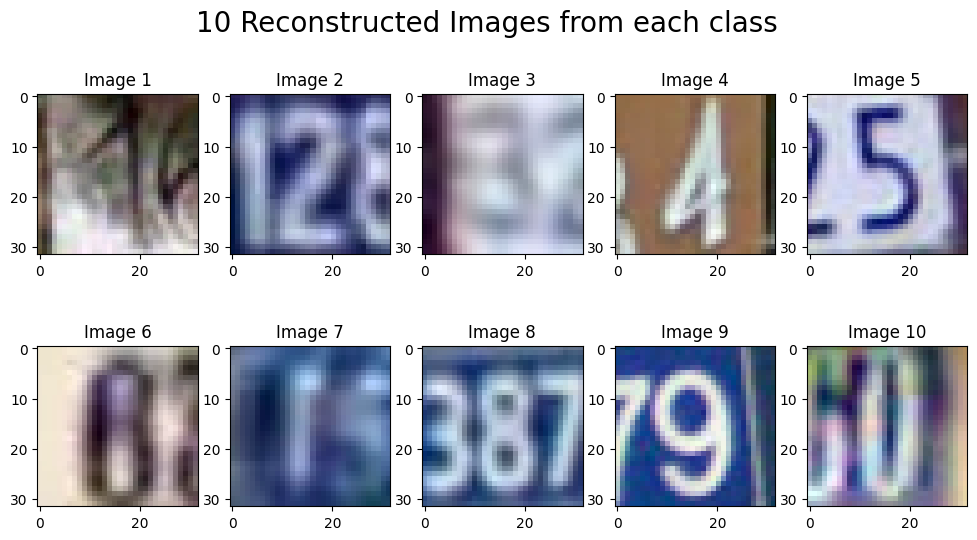

In [ ]:
#plotting 10 Reconstructed images
plt.figure(figsize = (12,6))
for i in range(10):
    reconstructed_X[i] = (reconstructed_X[i]-np.min(reconstructed_X[i])) / (np.max(reconstructed_X[i]) - np.min(reconstructed_X[i]))
    plt.subplot(2,5,i+1)
    plt.imshow(reconstructed_X[i].reshape(32,32,3))
    plt.title(f"Image {i+1}")
plt.suptitle("10 Reconstructed Images from each class",fontsize=20)
plt.show()

## Q1 (c) k-NN

###k-NN on raw data with k=5

In [ ]:
#k-NN model fit on raw data with k=5
k_near_neighbors = KNeighborsClassifier(n_neighbors = 5)
k_near_neighbors.fit(reshape_X,Y)

KNeighborsClassifier()

In [ ]:
#predicting the value using above trained model
predicted_Y = k_near_neighbors.predict(reshape_test_X)

In [ ]:
#calculating the accuracy of above model
raw_accuracy_score_5 = accuracy_score(test_Y,predicted_Y)
print(raw_accuracy_score_5)

0.40696066379840196


###k-NN on raw data with k=7

In [ ]:
#k-NN model fit on raw data with k=7
k_near_neighbors = KNeighborsClassifier(n_neighbors = 7)
k_near_neighbors.fit(reshape_X,Y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#predicting the value using above trained model
predicted_Y = k_near_neighbors.predict(reshape_test_X)

In [ ]:
#calculating the accuracy of above model
raw_accuracy_score_7 = accuracy_score(test_Y,predicted_Y)
print(raw_accuracy_score_7)

0.4156038721573448



###Data after pca for top eigenvectors which preserves atleast 90% of data

In [ ]:
#PCA fitting and transforming training data and transforming test data for 27 eigenvectors
pca_c1 = PCA(n_components = eigenvectors_count)
reduced_X = pca_c1.fit_transform(reshape_X)
reduced_test_X = pca_c1.transform(reshape_test_X)

###k-NN on data obtain with top eigenvectors (i.e. 27) from 1(a) with k=5

In [ ]:
#k-NN model fit on data reduced using top 27 eigenvectors with k=5
k_near_neighbors = KNeighborsClassifier(n_neighbors = 5)
k_near_neighbors.fit(reduced_X,Y)

KNeighborsClassifier()

In [ ]:
#predicting the value using above trained model
predicted_Y = k_near_neighbors.predict(reduced_test_X)

In [ ]:
#calculating the accuracy of above model
a_accuracy_score_5 = accuracy_score(test_Y,predicted_Y)
print(a_accuracy_score_5)

0.39777965580823604


###k-NN on data obtain with top eigenvectors (i.e. 27) from 1(a) with k=7

In [ ]:
#k-NN model fit on data reduced using top 27 eigenvectors with k=7
k_near_neighbors = KNeighborsClassifier(n_neighbors = 7)
k_near_neighbors.fit(reduced_X,Y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#predicting the value using above trained model
predicted_Y = k_near_neighbors.predict(reduced_test_X)

In [ ]:
#calculating the accuracy of above model
a_accuracy_score_7 = accuracy_score(test_Y,predicted_Y)
print(a_accuracy_score_7)

0.40884296250768287


###Data after pca for top 10 eigenvectors

In [ ]:
#PCA fitting and transforming training data and transforming test data for 10 eigenvectors
pca_c2 = PCA(n_components = 10)
reduced_X = pca_c2.fit_transform(reshape_X)
reduced_test_X = pca_c2.transform(reshape_test_X)

###k-NN on data obtain with top 10 eigenvectors from 1(b) with k=5

In [ ]:
#k-NN model fit on data reduced using top 10 eigenvectors with k=5
k_near_neighbors = KNeighborsClassifier(n_neighbors = 5)
k_near_neighbors.fit(reduced_X,Y)

KNeighborsClassifier()

In [ ]:
#predicting the value using above trained model
predicted_Y = k_near_neighbors.predict(reduced_test_X)

In [ ]:
#calculating the accuracy of above model
b_accuracy_score_5 = accuracy_score(test_Y,predicted_Y)
print(b_accuracy_score_5)

0.2520359557467732


###k-NN on data obtain with top 10 eigenvectors from 1(b) with k=5

In [ ]:
#k-NN model fit on data reduced using top 10eigenvectors with k=7
k_near_neighbors = KNeighborsClassifier(n_neighbors = 7)
k_near_neighbors.fit(reduced_X,Y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#predicting the value using above trained model
predicted_Y = k_near_neighbors.predict(reduced_test_X)

In [ ]:
#calculating the accuracy of above model
b_accuracy_score_7 = accuracy_score(test_Y,predicted_Y)
print(b_accuracy_score_7)

0.2600645359557468


In [ ]:
#printing accuracy score for all models with k = 5 and 7
print("Accuracy score of raw data with k = 5 : ",raw_accuracy_score_5)
print("Accuracy score of raw data with k = 7 : ",raw_accuracy_score_7)
print("Accuracy score of data after pca on 90% preservence with k = 5 : ",a_accuracy_score_5)
print("Accuracy score of data after pca on 90% preservence with k = 7 : ",a_accuracy_score_7)
print("Accuracy score of data after pca on top 10 eigenvectors with k = 5 : ",b_accuracy_score_5)
print("Accuracy score of data after pca on top 10 eigenvectors with k = 7 : ",b_accuracy_score_7)

Accuracy score of raw data with k = 5 :  0.40696066379840196
Accuracy score of raw data with k = 7 :  0.4156038721573448
Accuracy score of data after pca on 90% preservence with k = 5 :  0.39777965580823604
Accuracy score of data after pca on 90% preservence with k = 7 :  0.40884296250768287
Accuracy score of data after pca on top 10 eigenvectors with k = 5 :  0.2520359557467732
Accuracy score of data after pca on top 10 eigenvectors with k = 7 :  0.2600645359557468


###**Conclusion on Accuracy score for all model with k = 5 and k = 7**

Accuracy score increase as we increase the k value here from k = 5 to k = 7 in each case of input data. Another observation is considering the input data is that with raw data we got the accuracy of around 40% but it takes time to train the model as the data is with 3072 features while if we reduced the raw data using top eigenvectors 27 (here) then no of features decrease also the computing time decrease and accuracy remains almose same as raw data. While if we reduced the data using top 10 eigenvectors then computation time decrease but accuracy also get degrading.